In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv("Space_Corrected.csv")
dataset.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
dataset = dataset.drop(labels=['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
dataset.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
dataset.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [5]:
dataset.shape

(4324, 7)

In [6]:
dataset.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [8]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in dataset.columns:
    print('{} : {}'.format(col,dataset[col].unique()))

Company Name : ['SpaceX' 'CASC' 'Roscosmos' 'ULA' 'JAXA' 'Northrop' 'ExPace' 'IAI'
 'Rocket Lab' 'Virgin Orbit' 'VKS RF' 'MHI' 'IRGC' 'Arianespace' 'ISA'
 'Blue Origin' 'ISRO' 'Exos' 'ILS' 'i-Space' 'OneSpace' 'Landspace'
 'Eurockot' 'Land Launch' 'CASIC' 'KCST' 'Sandia' 'Kosmotras' 'Khrunichev'
 'Sea Launch' 'KARI' 'ESA' 'NASA' 'Boeing' 'ISAS' 'SRC' 'MITT' 'Lockheed'
 'AEB' 'Starsem' 'RVSN USSR' 'EER' 'General Dynamics' 'Martin Marietta'
 'Yuzhmash' 'Douglas' 'ASI' 'US Air Force' 'CNES' 'CECLES' 'RAE' 'UT'
 'OKB-586' 'AMBA' "Arm??e de l'Air" 'US Navy']
Location : ['LC-39A, Kennedy Space Center, Florida, USA'
 'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China'
 'Pad A, Boca Chica, Texas, USA'
 'Site 200/39, Baikonur Cosmodrome, Kazakhstan'
 'SLC-41, Cape Canaveral AFS, Florida, USA'
 'LC-9, Taiyuan Satellite Launch Center, China'
 'Site 31/6, Baikonur Cosmodrome, Kazakhstan'
 'LC-101, Wenchang Satellite Launch Center, China'
 'SLC-40, Cape Canaveral AFS, Florida, USA'
 'LA-Y1,

In [9]:
for col in dataset.columns:
    dataset[col].replace({'?':np.nan},inplace=True)

In [10]:
dataset.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
dataset.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

<AxesSubplot:>

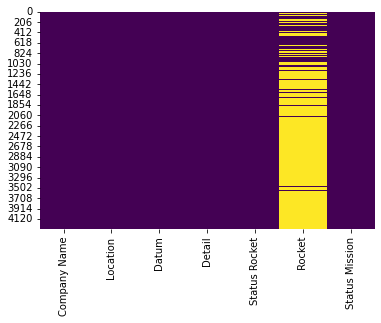

In [12]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [13]:
dataset.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [14]:
# Number of Launches by Every Company
ds=dataset["Company Name"].value_counts().reset_index()[:28]
ds

,index,Company Name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [ ]:
fig=go.Figure(go.Bar(x=ds["index"],
                    y=ds["Company Name"],
                    marker=dict(color=ds["Company Name"],
                               colorscale="bluered")))

fig.update_layout(title="Number of Launches by Every Company", xaxis_title="Top 28 Country", yaxis_title="count", hovermode="x")
fig.show()


In [ ]:
dataset['Status Mission' == 'Success'].value_counts()